In [313]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
from results import *
from scipy import stats

from composer.models.resnet import composer_resnet
from composer.trainer import Trainer
from composer.utils import S3ObjectStore

In [194]:
CKPT_BASE = 'ishana-resnet50-baseline/resnet50-imagenet-base-ej42/checkpoints/ep90-ba56250-rank0'
CKPT_MEDIUM = 'ishana-resnet50-medium/resnet50-imagenet-medium-ymk1/checkpoints/ep90-ba56250-rank0'

In [315]:
print(sum(pca_base)/len(pca_base))
print(sum(pca_base_average)/len(pca_base_average))
print(sum(pca_medium)/len(pca_medium))
print(sum(pca_medium_average)/len(pca_medium_average))
print(sum(pca_medium_90_average)/len(pca_medium_90_average))
print(sum(pca_progres)/len(pca_progres))
print(sum(pca_progres_average)/len(pca_progres_average))

print(sum(pca_mild_average)/len(pca_mild_average))
print(sum(pca_augmix_average)/len(pca_augmix_average))
print(sum(pca_ema_average)/len(pca_ema_average))
print(sum(pca_blurpool_average)/len(pca_blurpool_average))



0.6318120000000002
0.6272970000000005
0.6398540000000004
0.6877440007099986
0.63881759905
0.5934159999999996
0.593586400349999
0.6766909999600003
0.6247056000000009
0.721153999489999
0.63727520176


Text(0.5, 0.98, 'Correlation in per-class accuracy')

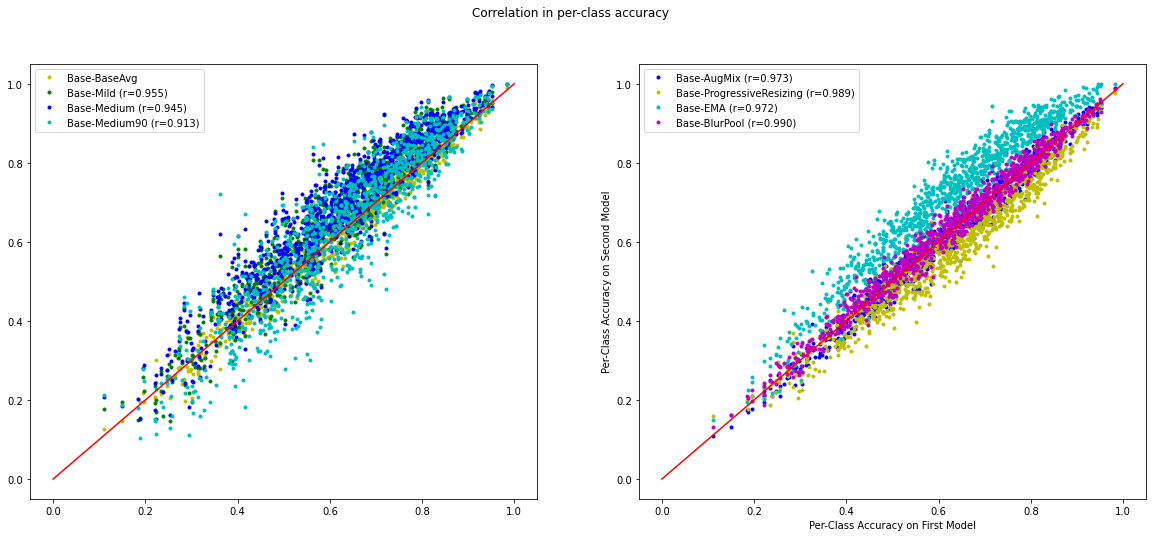

In [316]:
# plt.figure(figsize=(7, 7), dpi=100)
fig, axs = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(20)
# plt.plot(np.arange(0,1000,1), pca_base, 'go')
axs[0].plot(pca_base_average, pca_base, 'yo', ms=3)
axs[0].plot(pca_base_average, pca_mild_average, 'go', ms=3)
axs[0].plot(pca_base_average, pca_medium_average, 'bo', ms=3)
axs[0].plot(pca_base_average, pca_medium_90_average, 'co', ms=3)
axs[0].legend(["Base-BaseAvg", "Base-Mild (r=0.955)", "Base-Medium (r=0.945)", "Base-Medium90 (r=0.913)"])

axs[1].plot(pca_base_average, pca_augmix_average, 'bo', ms=3)
axs[1].plot(pca_base_average, pca_progres_average, 'yo', ms=3)
axs[1].plot(pca_base_average, pca_ema_average, 'co', ms=3)
axs[1].plot(pca_base_average, pca_blurpool_average, 'mo', ms=3)
axs[1].legend(["Base-AugMix (r=0.973)", "Base-ProgressiveResizing (r=0.989)", "Base-EMA (r=0.972)", "Base-BlurPool (r=0.990)"])
# plt.errorbar(pca_base_average, pca_mild_average, yerr=([m-n for m,n in zip(pca_mild_average, pca_mild_min)], [m-n for m,n in zip(pca_mild_max, pca_mild_average)]), xerr=([m-n for m,n in zip(pca_base_average, pca_base_min)], [m-n for m,n in zip(pca_base_max, pca_base_average)]),fmt="go", ms=2, linewidth=1)#[m-n for m,n in zip(pca_mild_max, pca_mild_min)], fmt="o")

axs[0].plot([0,1], [0,1], 'r')
axs[1].plot([0,1], [0,1], 'r')
# axs[0].xlabel('Per-Class Accuracy on First Model')
# axs[1].xlabel('Per-Class Accuracy on First Model')
plt.ylabel('Per-Class Accuracy on Second Model')
plt.xlabel('Per-Class Accuracy on First Model')
fig.suptitle("Correlation in per-class accuracy")
#plot error bars/pull out numbers for outliers

In [299]:
slope, intercept, r_value, p_value, std_err = stats.linregress(pca_base_average,pca_base)
print(f"Correlation between base and baseavg: {r_value}, {std_err}") 
slope, intercept, r_value, p_value, std_err = stats.linregress(pca_base_average,pca_mild_average)
print(f"Correlation between base and mild: {r_value}, {std_err}") 
slope, intercept, r_value, p_value, std_err = stats.linregress(pca_base_average, pca_medium_average)
print(f"Correlation between base and medium: {r_value}, {std_err}") # CORRELATION BETWEEN PREDICTION ACCRUACIES PER CLASS
slope, intercept, r_value, p_value, std_err = stats.linregress(pca_base_average, pca_medium_90_average)
print(f"Correlation between base and medium90: {r_value}, {std_err}") 
slope, intercept, r_value, p_value, std_err = stats.linregress(pca_base_average,pca_progres_average)
print(f"Correlation between base and augmix: {r_value}, {std_err}") 
slope, intercept, r_value, p_value, std_err = stats.linregress(pca_base_average,pca_augmix_average)
print(f"Correlation between base and progres: {r_value}, {std_err}") 
slope, intercept, r_value, p_value, std_err = stats.linregress(pca_base_average,pca_ema_average)
print(f"Correlation between base and ema: {r_value}, {std_err}") 
slope, intercept, r_value, p_value, std_err = stats.linregress(pca_base_average,pca_blurpool_average)
print(f"Correlation between base and blurpool: {r_value}, {std_err}") 

Correlation between base and baseavg: 0.9839767425406706, 0.005746412040724091
Correlation between base and mild: 0.9554524779206868, 0.009940622543783542
Correlation between base and medium: 0.9457654441655009, 0.010683547787994747
Correlation between base and medium90: 0.9130225287584076, 0.014598918194703533
Correlation between base and augmix: 0.9733560795632632, 0.007088278094446126
Correlation between base and progres: 0.9894140973118212, 0.004673800948423142
Correlation between base and ema: 0.9722142904446631, 0.007536504113605108
Correlation between base and blurpool: 0.9904056825066118, 0.004317875860868211


Base Distribution: 0.627297, 0.16503961582298962
Mild Distribution: 0.67669099996, 0.17560288602724097
Medium Distribution: 0.68749866613, 0.171469027458937
Medium 90 Distribution: 0.63881759905, 0.18659960449845098
AugMix Distribution: 0.6247056, 0.16791795742452578
ProgRes Distribution: 0.59358640035, 0.1611730518649639
EMA Distribution: 0.7211539994899999, 0.1678555164835586
BlurPool Distribution: 0.63727520176, 0.16290926430751626


Text(0.5, 0.98, 'Distribution of per-class accuracies')

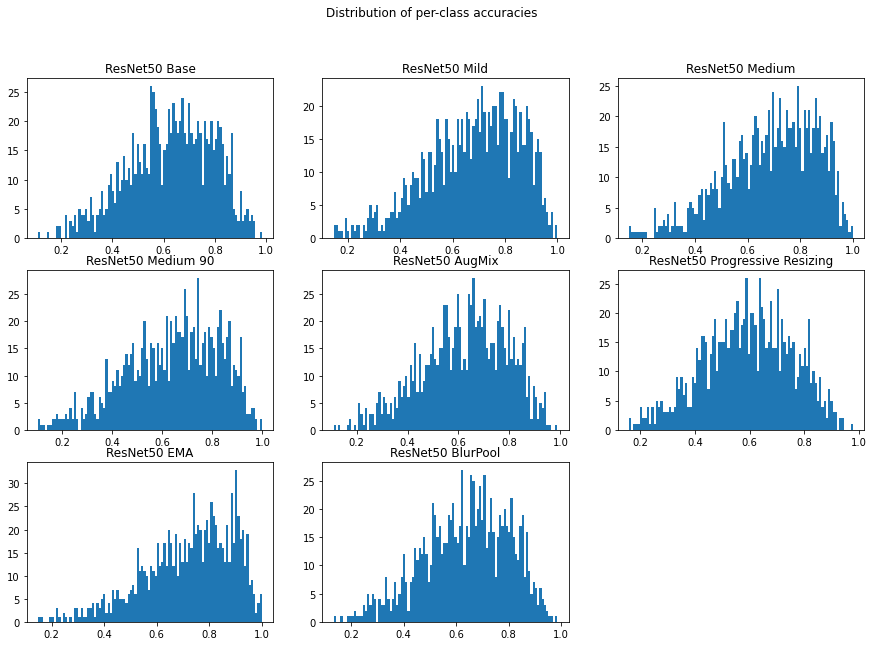

In [302]:
(bmu, bsigma) = stats.norm.fit(pca_base_average)
(mmu, msigma) = stats.norm.fit(pca_medium_average)
(m90mu, m90sigma) = stats.norm.fit(pca_medium_90_average)
(mimu, misigma) = stats.norm.fit(pca_mild_average)
(pmu, psigma) = stats.norm.fit(pca_progres_average)
(amu, asigma) = stats.norm.fit(pca_augmix_average)
(emu, esigma) = stats.norm.fit(pca_ema_average)
(blmu, blsigma) = stats.norm.fit(pca_blurpool_average)
print(f"Base Distribution: {bmu}, {bsigma}") 
print(f"Mild Distribution: {mimu}, {misigma}") 
print(f"Medium Distribution: {mmu}, {msigma}") 
print(f"Medium 90 Distribution: {m90mu}, {m90sigma}") 
print(f"AugMix Distribution: {amu}, {asigma}")
print(f"ProgRes Distribution: {pmu}, {psigma}")
print(f"EMA Distribution: {emu}, {esigma}")
print(f"BlurPool Distribution: {blmu}, {blsigma}")

fig, axs = plt.subplots(3,3)
fig.set_figheight(10)
fig.set_figwidth(15)
n, bins, patches = axs[0,0].hist(pca_base_average, bins=100)

y = stats.norm.pdf(bins, bmu, bsigma)
# l = axs[0,0].plot(bins, y, 'r--', linewidth=2)
axs[0,0].title.set_text('ResNet50 Base')

n, bins, patches = axs[0,1].hist(pca_mild_average, bins=100)
y = stats.norm.pdf(bins, mimu, misigma)
# l = axs[0,1].plot(bins, y, 'r--', linewidth=2)
axs[0,1].title.set_text('ResNet50 Mild')

n, bins, patches = axs[0,2].hist(pca_medium_average, bins=100)
y = stats.norm.pdf(bins, mmu, msigma)
# l = axs[1,0].plot(bins, y, 'r--', linewidth=2)
axs[0,2].title.set_text('ResNet50 Medium')

n, bins, patches = axs[1,0].hist(pca_medium_90_average, bins=100)
y = stats.norm.pdf(bins, m90mu, m90sigma)
# l = axs[1,0].plot(bins, y, 'r--', linewidth=2)
axs[1,0].title.set_text('ResNet50 Medium 90')

n, bins, patches = axs[1,1].hist(pca_augmix_average, bins=100)
y = stats.norm.pdf(bins, amu, asigma)
# l = axs[1,1].plot(bins, y, 'r--', linewidth=2)
axs[1,1].title.set_text('ResNet50 AugMix')

n, bins, patches = axs[1,2].hist(pca_progres_average, bins=100)
y = stats.norm.pdf(bins, pmu, psigma)
# l = axs[2,0].plot(bins, y, 'r--', linewidth=2) 
axs[1,2].title.set_text('ResNet50 Progressive Resizing')

n, bins, patches = axs[2,0].hist(pca_ema_average, bins=100)
y = stats.norm.pdf(bins, emu, esigma)
# l = axs[2,0].plot(bins, y, 'r--', linewidth=2) 
axs[2,0].title.set_text('ResNet50 EMA')

n, bins, patches = axs[2,1].hist(pca_blurpool_average, bins=100)
y = stats.norm.pdf(bins, blmu, blsigma)
# l = axs[2,0].plot(bins, y, 'r--', linewidth=2) 
axs[2,1].title.set_text('ResNet50 BlurPool')

fig.delaxes(axs[2,2])
fig.suptitle("Distribution of per-class accuracies")


Text(0, 0.5, 'Difference in accuracy')

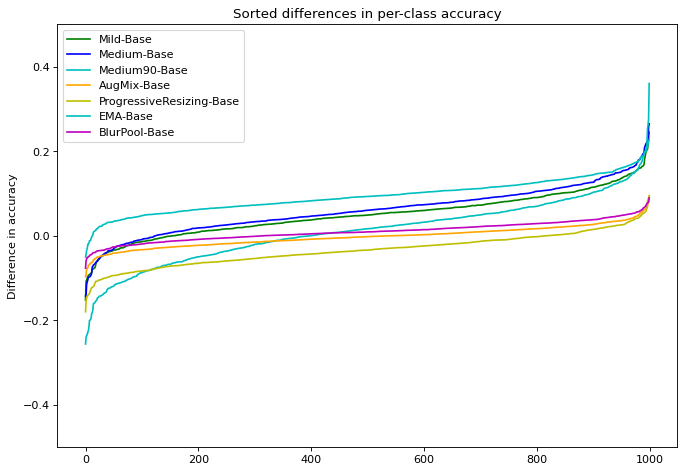

In [309]:
plt.figure(figsize=(10, 7), dpi=80)
plt.ylim(-0.5,0.5)
plt.plot(np.arange(0,1000,1), sorted([m-b for m,b in zip(pca_mild_average,pca_base_average)]), 'g')
plt.plot(np.arange(0,1000,1), sorted([m-b for m,b in zip(pca_medium_average,pca_base_average)]), 'b')
plt.plot(np.arange(0,1000,1), sorted([m-b for m,b in zip(pca_medium_90_average,pca_base_average)]), 'c')
plt.plot(np.arange(0,1000,1), sorted([m-b for m,b in zip(pca_augmix_average,pca_base_average)]), 'orange')
plt.plot(np.arange(0,1000,1), sorted([m-b for m,b in zip(pca_progres_average,pca_base_average)]), 'y')
plt.plot(np.arange(0,1000,1), sorted([m-b for m,b in zip(pca_ema_average,pca_base_average)]), 'c')
plt.plot(np.arange(0,1000,1), sorted([m-b for m,b in zip(pca_blurpool_average,pca_base_average)]), 'm')
plt.legend(['Mild-Base' , 'Medium-Base', 'Medium90-Base', 'AugMix-Base', 'ProgressiveResizing-Base', 'EMA-Base', 'BlurPool-Base'])
plt.title("Sorted differences in per-class accuracy")
plt.ylabel("Difference in accuracy")

Text(0, 0.5, 'Difference in accuracy')

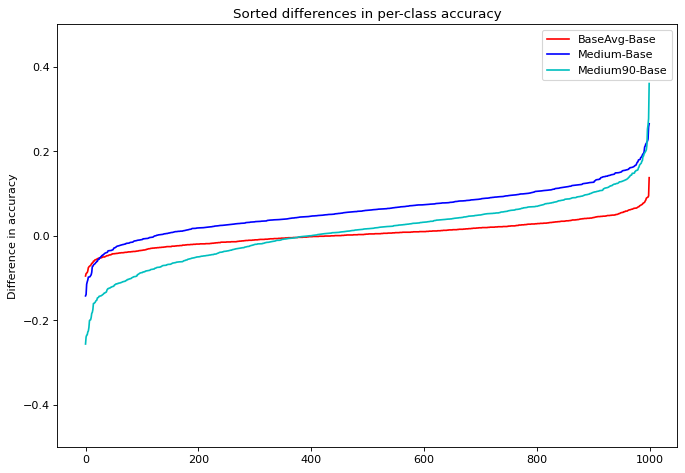

In [312]:
plt.figure(figsize=(10, 7), dpi=80)
plt.ylim(-0.5,0.5)
plt.plot(np.arange(0,1000,1), sorted([m-b for m,b in zip(pca_base,pca_base_average)]), 'r')
plt.plot(np.arange(0,1000,1), sorted([m-b for m,b in zip(pca_medium_average,pca_base_average)]), 'b')
plt.plot(np.arange(0,1000,1), sorted([m-b for m,b in zip(pca_medium_90_average,pca_base_average)]), 'c')
plt.legend(['BaseAvg-Base', 'Medium-Base', 'Medium90-Base'])
plt.title("Sorted differences in per-class accuracy")
plt.ylabel("Difference in accuracy")

In [19]:
object_store = S3ObjectStore(
    bucket="mosaicml-internal-checkpoints-bert",  # The name of the cloud container (i.e. bucket) to use.
    aws_access_key_id=AWS_ACCESS_KEY_ID,
    aws_secret_access_key=AWS_SECRET_ACCESS_KEY,
    aws_session_token=AWS_SESSION_TOKEN,
)

model = composer_resnet('resnet50')
new_trainer = Trainer(
    model=model,
    load_path=CKPT_BASE,
    load_object_store=object_store,
)

for evald in new_trainer.state.eval_metrics.keys():
    for name, metric in new_trainer.state.eval_metrics[evald].items():
        if name == 'ConfusionMatrix':
            ls = []
            for l in list(metric.compute().cpu().numpy()):
                ls.append(l)
            

/Users/ishanashastri/composer/composer/trainer/trainer.py:822: UserWarning: No optimizer was specified. Defaulting to DecoupledSGDW(lr=0.1)
  warnings.warn(('No optimizer was specified. Defaulting to '
/Users/ishanashastri/composer/composer/core/state.py:520: UserWarning: ClosureGradScaler is not in the state_dict. Its state will not be restored.
  warnings.warn(


In [21]:
new_trainer = Trainer(
    model=model,
    load_path=CKPT_MEDIUM,
    load_object_store=object_store,
)

for evald in new_trainer.state.eval_metrics.keys():
    for name, metric in new_trainer.state.eval_metrics[evald].items():
        if name == 'ConfusionMatrix':
            ls_medium = []
            for l in list(metric.compute().cpu().numpy()):
                ls_medium.append(l)
            

/Users/ishanashastri/composer/composer/trainer/trainer.py:822: UserWarning: No optimizer was specified. Defaulting to DecoupledSGDW(lr=0.1)
  warnings.warn(('No optimizer was specified. Defaulting to '
Found these missing keys in the checkpoint: module.layer2.0.conv2.weight, module.layer2.0.downsample.0.weight, module.layer3.0.conv2.weight, module.layer3.0.downsample.0.weight, module.layer4.0.conv2.weight, module.layer4.0.downsample.0.weight
Found these unexpected keys in the checkpoint: module.maxpool.filt2d, module.layer2.0.conv2.blur_filter, module.layer2.0.conv2.conv.weight, module.layer2.0.downsample.0.blur_filter, module.layer2.0.downsample.0.conv.weight, module.layer3.0.conv2.blur_filter, module.layer3.0.conv2.conv.weight, module.layer3.0.downsample.0.blur_filter, module.layer3.0.downsample.0.conv.weight, module.layer4.0.conv2.blur_filter, module.layer4.0.conv2.conv.weight, module.layer4.0.downsample.0.blur_filter, module.layer4.0.downsample.0.conv.weight
/Users/ishanashastri/co

/var/folders/kg/8nf5nzvs6k75g2l0rmsp_2p40000gn/T/ipykernel_49302/2802548482.py:1: RuntimeWarning: divide by zero encountered in log
  df_cm = pd.DataFrame(np.log(ls), index = [i for i in classes],


<AxesSubplot:title={'center':'Resnet50 Confusion Matrix'}>

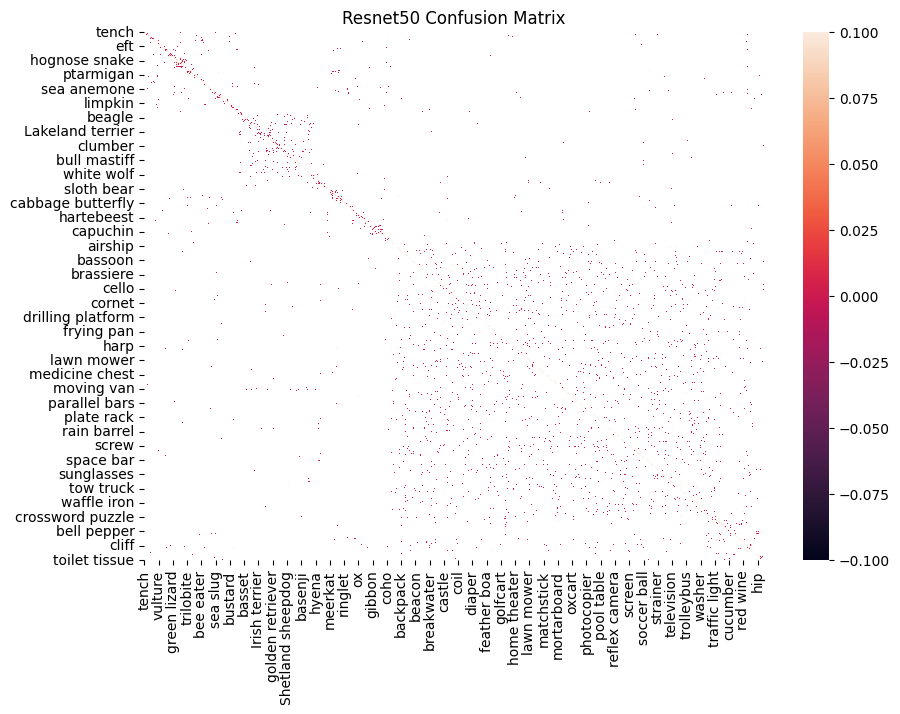

In [184]:
df_cm = pd.DataFrame(np.log(ls), index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (10,7), dpi=100)
plt.title('Resnet50 Confusion Matrix')
sn.heatmap(df_cm)

/var/folders/kg/8nf5nzvs6k75g2l0rmsp_2p40000gn/T/ipykernel_49302/2086246336.py:1: RuntimeWarning: divide by zero encountered in log
  df_cm = pd.DataFrame(np.log(ls_medium), index = [i for i in classes],


<AxesSubplot:title={'center':'Resnet50 Medium Confusion Matrix'}>

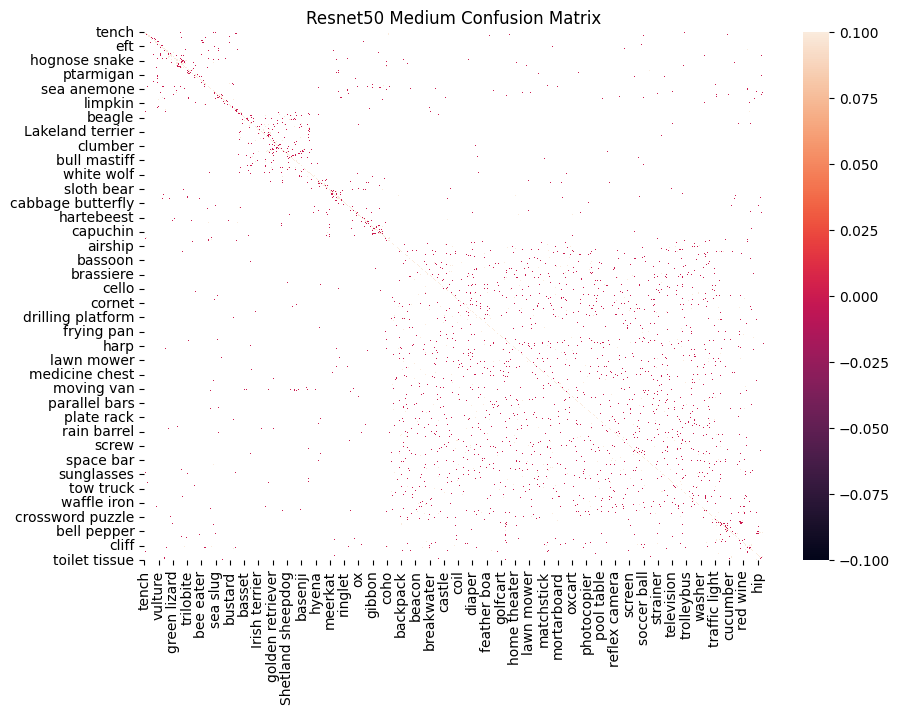

In [185]:
df_cm = pd.DataFrame(np.log(ls_medium), index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (10,7), dpi=100)
plt.title('Resnet50 Medium Confusion Matrix')
sn.heatmap(df_cm)

/var/folders/kg/8nf5nzvs6k75g2l0rmsp_2p40000gn/T/ipykernel_49302/923582309.py:1: RuntimeWarning: divide by zero encountered in log
  df_cm = pd.DataFrame(([np.log(m-n) for m,n in zip(ls,ls_medium)])/np.sum(ls_medium) *1000, index = [i for i in classes],
/var/folders/kg/8nf5nzvs6k75g2l0rmsp_2p40000gn/T/ipykernel_49302/923582309.py:1: RuntimeWarning: invalid value encountered in log
  df_cm = pd.DataFrame(([np.log(m-n) for m,n in zip(ls,ls_medium)])/np.sum(ls_medium) *1000, index = [i for i in classes],


<AxesSubplot:title={'center':'Resnet50 Diff Confusion Matrix'}>

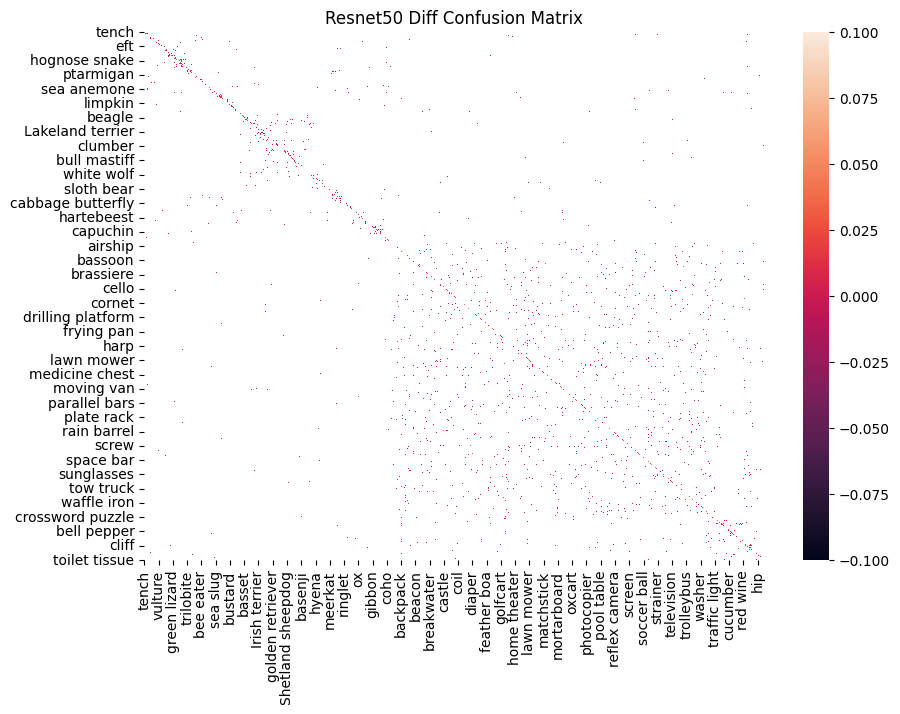

In [186]:
df_cm = pd.DataFrame(([np.log(m-n) for m,n in zip(ls,ls_medium)])/np.sum(ls_medium) *1000, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (10,7), dpi=100)
plt.title('Resnet50 Diff Confusion Matrix')
sn.heatmap(df_cm)